Importing and Exploring the dataset

In [3]:
#Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#Setting seaborn style
sns.set_style(style="whitegrid")

In [6]:
#Importing dataset

df= pd.read_csv("/content/drug200.csv")

In [29]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
df.shape

(200, 6)

In [9]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [10]:
#Checking for number of null values

df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Age    Sex     BP  Cholesterol  Na_to_K   Drug
0    False  False  False        False    False  False
1    False  False  False        False    False  False
2    False  False  False        False    False  False
3    False  False  False        False    False  False
4    False  False  False        False    False  False
..     ...    ...    ...          ...      ...    ...
195  False  False  False        False    False  False
196  False  False  False        False    False  False
197  False  False  False        False    False  False
198  False  False  False        False    False  False
199  False  False  False        False    False  False

[200 rows x 6 columns]>

In [12]:
#Checking for number of duplicate values

df.duplicated().sum()

0

In [16]:
#Correlation between the numeric features/columns

df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [17]:
#Checking class distribution
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Visualizing the dataset

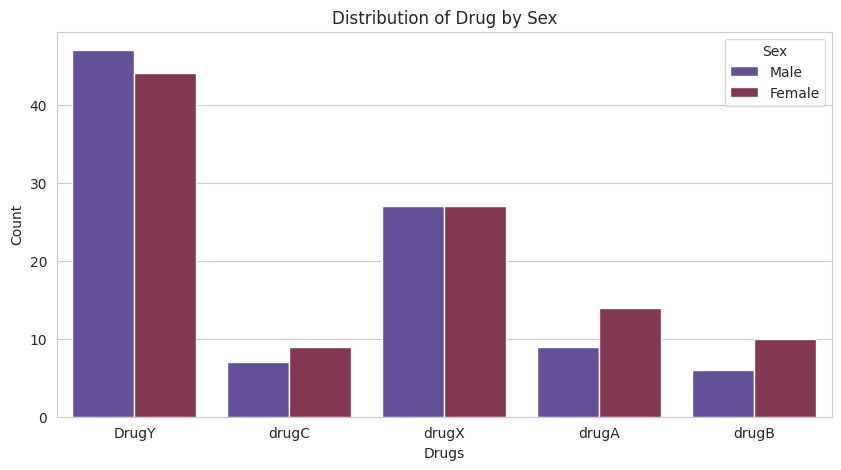

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]

sns.countplot(data=df, x="Drug", hue="Sex", palette="twilight")
plt.title("Distribution of Drug by Sex")
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

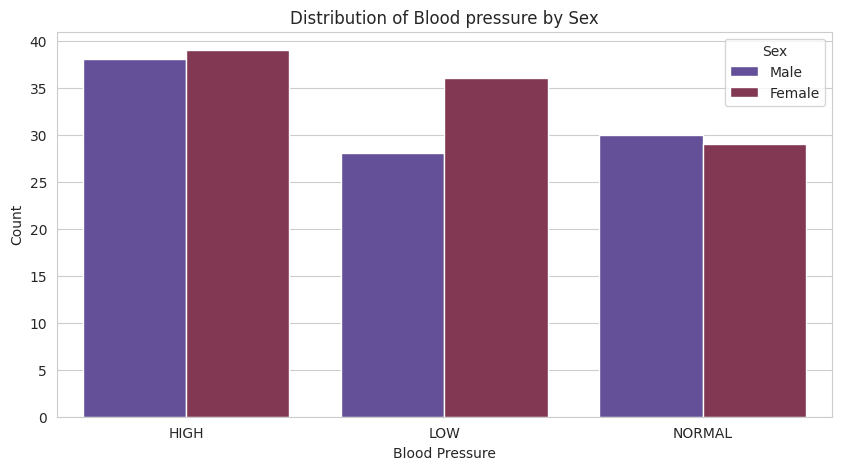

In [19]:
sns.countplot(data=df, x="BP", hue="Sex", palette="twilight")
plt.title("Distribution of Blood pressure by Sex")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

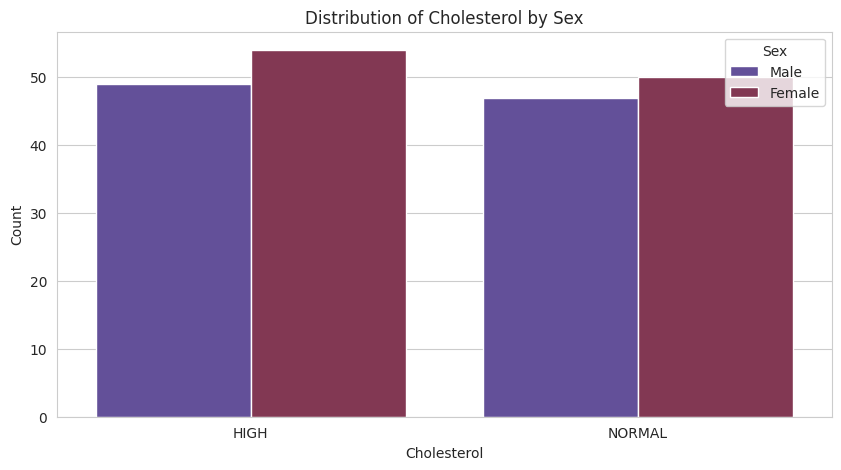

In [20]:
sns.countplot(data=df, x="Cholesterol", hue="Sex", palette="twilight")
plt.title("Distribution of Cholesterol by Sex")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [22]:
#Separating labels from the feature data
X = df.drop("Drug", axis=1)
y = df["Drug"]

In [23]:
#Transforming the nominal labels into numeric type
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [24]:
#Spltting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.5, random_state = 0)

In [25]:
#Using transformers as a part of preprocessing

trans_x = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(drop="first"),["Sex", "BP", "Cholesterol"]),
    ("trf2", StandardScaler(), ["Age", "Na_to_K"])
], remainder="passthrough")

In [26]:
#Applying the above created transformer
X_train_new = trans_x.fit_transform(X_train)
X_test_new = trans_x.fit_transform(X_test)

Model Training

In [27]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(X_train_new, y_train)

SGDClassifier()

Measuring performance using cross-validation

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Define the scoring metric
scoring = "accuracy"

# Cross-validation using cross_val_score with cv=10
cv_scores = cross_val_score(sgdc, X_train_new, y_train, cv=10, scoring=scoring)
print("Cross-validation scores (cv=10):")
print(cv_scores)
print()

# KFold cross-validation
kfold = KFold(n_splits=10)
kfold_scores = cross_val_score(sgdc, X_train_new, y_train, cv=kfold, scoring=scoring)
print("KFold cross-validation:")
print(f"Scores: {kfold_scores}")
print(f"Mean: {np.mean(kfold_scores)}")
print(f"Standard Deviation: {np.std(kfold_scores)}")
print()

# StratifiedKFold cross-validation
stratified_kfold = StratifiedKFold(n_splits=10)
stratified_kfold_scores = cross_val_score(sgdc, X_train_new, y_train, cv=stratified_kfold, scoring=scoring)
print("StratifiedKFold cross-validation:")
print(f"Scores: {stratified_kfold_scores}")
print(f"Mean: {np.mean(stratified_kfold_scores)}")
print(f"Standard Deviation: {np.std(stratified_kfold_scores)}")

Cross-validation scores (cv=10):
[0.9 1.  0.9 1.  0.9 0.8 0.9 0.9 1.  1. ]

KFold cross-validation:
Scores: [0.8 0.9 0.9 1.  0.8 0.9 0.9 0.9 0.9 0.9]
Mean: 0.89
Standard Deviation: 0.05385164807134503

StratifiedKFold cross-validation:
Scores: [0.9 1.  1.  1.  0.8 0.8 1.  1.  0.9 1. ]
Mean: 0.9400000000000001
Standard Deviation: 0.07999999999999999


Confusion Matrix

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred1 = cross_val_predict(sgdc, X_train_new, y_train, cv=10)
cm1 = confusion_matrix(y_train, y_pred1)
cm1

array([[43,  0,  0,  0,  1],
       [ 2, 11,  0,  0,  0],
       [ 1,  0,  8,  0,  0],
       [ 1,  0,  0,  6,  1],
       [ 2,  0,  0,  0, 24]])

<Axes: >

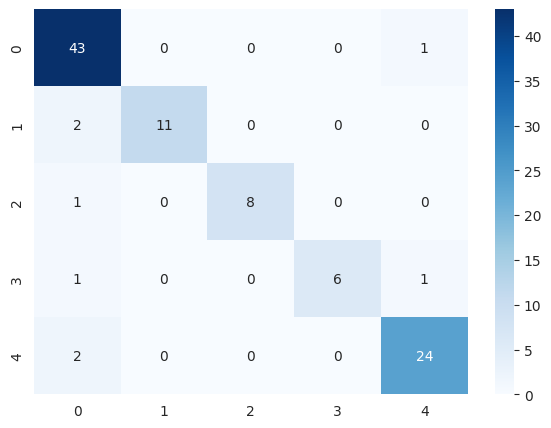

In [32]:
#Visualizing the confusion matrxi using heatmap

plt.figure(figsize=(7,5))
sns.heatmap(cm1, cmap="Blues", annot=True)

Multi-Class Classification

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Calculate precision, recall, and F1 score
pre = precision_score(y_train, y_pred1, average="macro")
rec = recall_score(y_train, y_pred1, average="macro")
f1 = f1_score(y_train, y_pred1, average="macro")

# Print the evaluation metrics
print("Precision Score: {:.2f}".format(pre))
print("Recall Score: {:.2f}".format(rec))
print("F1 Score: {:.2f}".format(f1))

# Use cross-validation to obtain predicted scores
y_score = cross_val_predict(sgdc, X_train_new, y_train, cv=3)

Precision Score: 0.96
Recall Score: 0.88
F1 Score: 0.91


KNN Classification

Accuracy: 0.82
Precision: 0.77
Recall: 0.85
F1 Score: 0.80


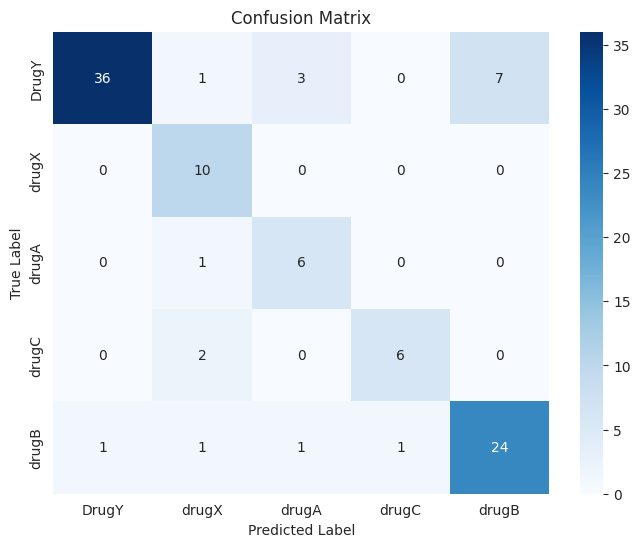

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_new, y_train)


y_pred = knn_classifier.predict(X_test_new)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
# Print evaluation metrics with 2 decimal places
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
